This is a test for the weno reconstruction for non-periodic case (which can be used for the periodic case by appropriately populating the ghost zones).

It works OK, BUT, it is only third order accurate for the derivatives. No matter what. To get something better it seems one has to increase the stencils. 

In [1]:
using Plots
using Revise
# include project utilities
includet("choques_utils.jl")
# complementary_utils.jl is included so its TVD routines are available if you want to call them.

includet("complementary_utils.jl")


In [9]:
function average_poly_values(p,dx,n,x0)
    # given x^p conpute the average values over the cells
    #[((x0 + dx*n+dx/2)^(p+1) - (x0 + dx*n - dx/2)^(p+1)) / (dx*(p+1)) for n in 0:(n-1)]
    [-((x0 + dx*n)^(p+1) - (x0 + dx*(n+1))^(p+1)) / (dx*(p+1)) for n in 0:(n-1)]
end

average_poly_values (generic function with 1 method)

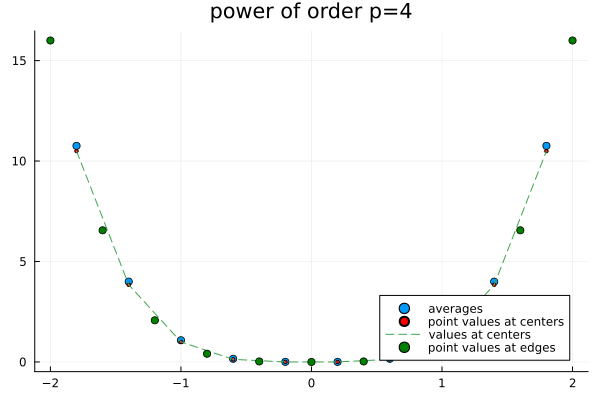

In [163]:
n = 11
L = 4
dx = L / (n-1)
x0 = -L/2
x_centers = ((0:n-2) .* dx) .+ dx/2 .+ x0
x_p = (0:n-1) .* dx .+ x0
p = 4
u_bar_int = average_poly_values(p,dx,n-1, x0)
scatter(x_centers,u_bar_int, label="averages", title = "power of order p=$p" )
scatter!(x_centers, (x_centers).^p, label="point values at centers", color=:red, markersize=2)
plot!(x_centers, (x_centers).^p, label="values at centers", linestyle=:dash)
scatter!(x_p, (x_p).^p, label="point values at edges", color=:green)


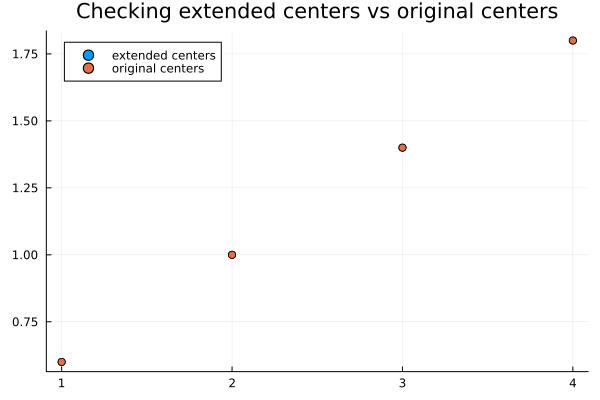

In [164]:
m = n + 4
x0_ext = x0 -3dx
#x0 = -5dx/2

x_centers_ext = ((0:m) .* dx) .+ (x0_ext) .+ dx/2
scatter(x_centers_ext[m - 5:m-2], title="Checking extended centers vs original centers", label="extended centers")
scatter!(x_centers[n-4:n-1], label="original centers")


In [165]:
u0 = average_poly_values(p,dx,m+1, x0_ext)
@show size(u0)  # Should be m = n +1 + 4 
@show size(x_centers_ext)  # Should be m = n + 5


size(u0) = (16,)
size(x_centers_ext) = (16,)


(16,)

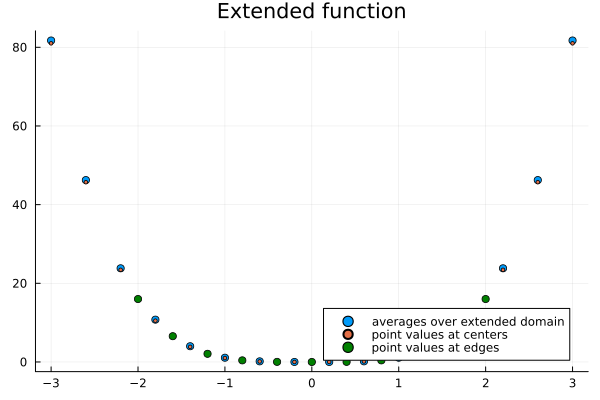

In [166]:

scatter(x_centers_ext,u0, title = "Extended function", label="averages over extended domain")
scatter!(x_centers_ext, (x_centers_ext).^p, label="point values at centers", markersize=2)
scatter!(x_p, (x_p).^p, label="point values at edges", color=:green)

In [167]:
uL, uR, duL, duR = WENOZ_FV_reconstruct_from_averages(u0, dx) # Just to test that it runs

([16.000000000000014, 6.553599999999994, 2.0736000000000017, 0.40960000000000063, 0.025599999999999633, 7.28583859910259e-17, 0.02559999999999986, 0.40959999999999996, 2.0736000000000043, 6.553600000000001, 16.000000000000007], [16.00000000000001, 6.553599999999998, 2.0736000000000008, 0.40960000000000035, 0.025599999999999862, 6.938893903907228e-17, 0.025599999999999883, 0.40959999999999885, 2.0736000000000088, 6.553599999999989, 16.000000000000032], [-42.73920000000004, -23.462400000000027, -11.097599999999991, -4.108800000000001, -0.960000000000001, -0.11519999999999961, -0.03840000000000076, 0.8063999999999996, 3.9552000000000196, 10.943999999999962, 23.308800000000076], [-37.440000000000055, -19.776000000000028, -8.716799999999983, -2.726400000000002, -0.26880000000000115, 0.19200000000000086, 0.19199999999999967, 1.2671999999999968, 4.953600000000031, 12.787199999999936, 26.304000000000123])

In [7]:
#length(uL)  # Should be n = 201

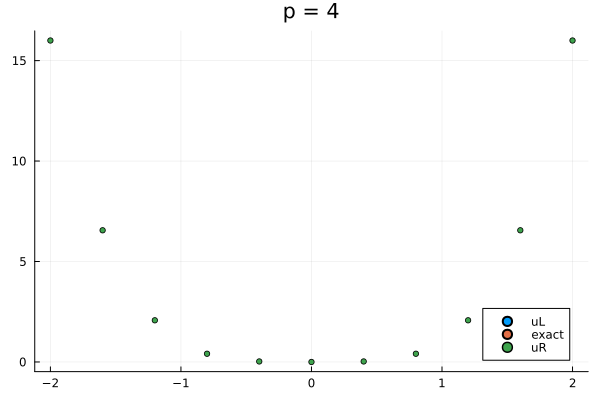

In [168]:
scatter(x_p,uL, label="uL", title = "p = $p", markersize=2)
scatter!(x_p,x_p.^p, label="exact", markersize=2)
scatter!(x_p,uR, label = "uR", markersize=3)

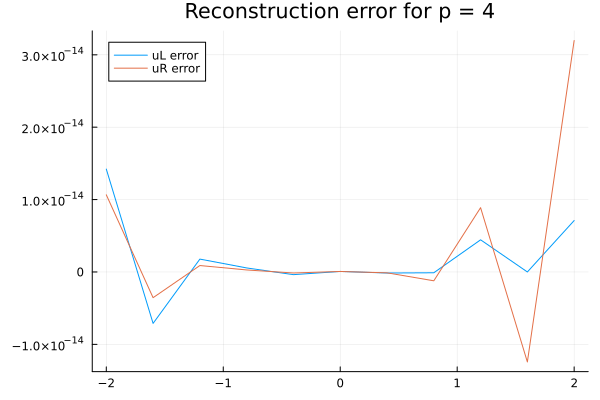

In [169]:
plot(x_p,uL - x_p.^p, label = "uL error", title = "Reconstruction error for p = $p")
plot!(x_p,uR - x_p.^p, label = "uR error")

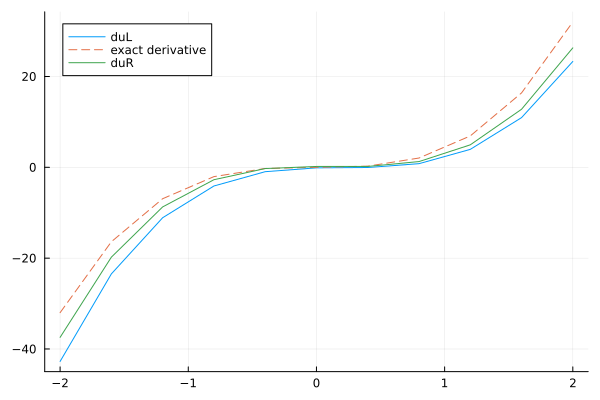

In [170]:
plot(x_p, duL, label="duL")
plot!(x_p, p*x_p.^(p-1), label="exact derivative", linestyle=:dash)
plot!(x_p, duR, label="duR")  

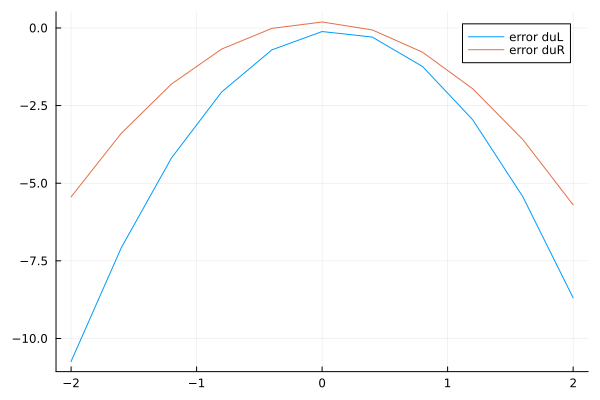

In [171]:
plot(x_p, duL - p*x_p.^(p-1), label="error duL")
plot!(x_p, duR - p*x_p.^(p-1), label="error duR")  

In [172]:
@show p, n
@show sum(abs.(uL - x_p.^p)) / n
@show sum(abs.(uR - x_p.^p)) / n
@show sum(abs.(duL - p*x_p.^(p-1))) / n
@show sum(abs.(duR - p*x_p.^(p-1))) / n

(p, n) = (4, 11)
sum(abs.(uL - x_p .^ p)) / n = 3.2631725604465537e-15
sum(abs.(uR - x_p .^ p)) / n = 6.38378239159465e-15
sum(abs.(duL - p * x_p .^ (p - 1))) / n = 3.9551999999999996
sum(abs.(duR - p * x_p .^ (p - 1))) / n = 2.146909090909089


2.146909090909089

(p, n) = (2, 201)
sum(abs.(uL - x .^ p)) / n = 2.5510718312309582e-15
sum(abs.(uR - x .^ p)) / n = 2.577850779418629e-15
sum(abs.(duL - p * x .^ (p - 1))) / n = 0.019999999999993245
sum(abs.(duR - p * x .^ (p - 1))) / n = 0.007999999999994956

(p, n) = (3, 201)
sum(abs.(uL - x .^ p)) / n = 3.504499251805946e-15
sum(abs.(uR - x .^ p)) / n = 3.3198136945253183e-15
sum(abs.(duL - p * x .^ (p - 1))) / n = 0.06030009950248602
sum(abs.(duR - p * x .^ (p - 1))) / n = 0.024124776119409063

(p, n) = (4, 201)
sum(abs.(uL - x .^ p)) / n = 5.829543278212534e-15
sum(abs.(uR - x .^ p)) / n = 5.83344372386125e-15
sum(abs.(duL - p * x .^ (p - 1))) / n = 0.16161439999998206
sum(abs.(duR - p * x .^ (p - 1))) / n = 0.06462213731343115

(p, n) = (5, 201)
sum(abs.(uL - x .^ p)) / n = 6.3999988096115706e-9
sum(abs.(uR - x .^ p)) / n = 6.400001051301997e-9
sum(abs.(duL - p * x .^ (p - 1))) / n = 0.40608230978438853
sum(abs.(duR - p * x .^ (p - 1))) / n = 0.16230796417911367

### Discontinuos Test:

We add two terms one which is discontinuous and one that has discontinuous derivative. We need to compute correctly the averages at those points. 

We aling the cells so that, for x0 = -L/2, one central point is at x = dx/2 so the cell interfases are at x=0 and x = dx.
There for the step function we get that there the the average corresponding to that point is: (1-s)/2
where the discontinuity is at x_i + s*dx/2 so a bit to the right of the middle, if s > 0.

For the $|x-x_2|$ function the average in the cells is: 

$$
\bar(|x - x_2|) = |x - x_2| \;\; \text{for} \;\;\; x - x_2 < dx/2
$$

In the cell where the function becomes zero the average value is:

$$
dx/4*(s^2 + 1)
$$






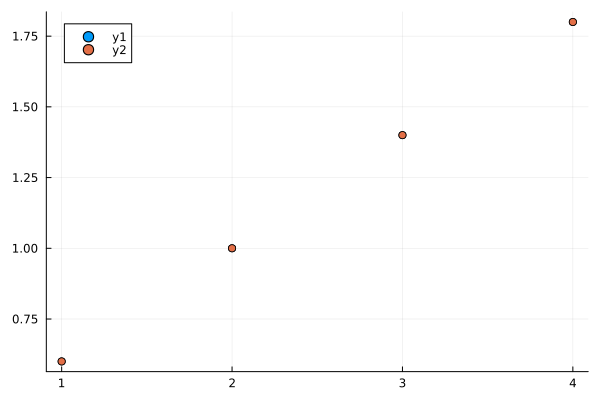

In [122]:
#Checking the arrays so that the cell centers are not aligned with the points where we put the discontinuities:

scatter(x_centers_ext[m - 5:m-2])
scatter!(x_centers[n-4:n-1])

#minimum(abs.(x_centers_ext))

In [173]:
function θ_ave(x,x1,s,dx) 
    if x < x1 - dx
        return 0.0
    elseif x < x1 && x < x1 + dx/2
        return s*(s-1)/2
    else
        return 1.0
    end 
end

θ(x,x1) = ifelse(x < x1, 0.0, 1.0)

Iθ(x,x1) = abs(x - x1)

function Iθ_ave(x,x1,s,dx)
    if abs(x - x1) <= dx/2 
        return (s^2 + 1)*dx/4
    else
        return abs(x - x1)
    end 
end

s1 = 1/2 # we put the discontinuity at x = dx/2 + dx/4 If we change sign we find the larger error at the left reconstruction.
s2 = 1/2 # we put the discontinuity at x = 1 + dx/2 + dx/4
x1 = s1*dx/2
x2 = 1 + dx/2 + s2*dx/2
u_bar = u0 + [θ(xi,x1) + Iθ(xi,x2) for xi in x_centers_ext];
size(u_bar)  # Should be m = n + 5

(16,)

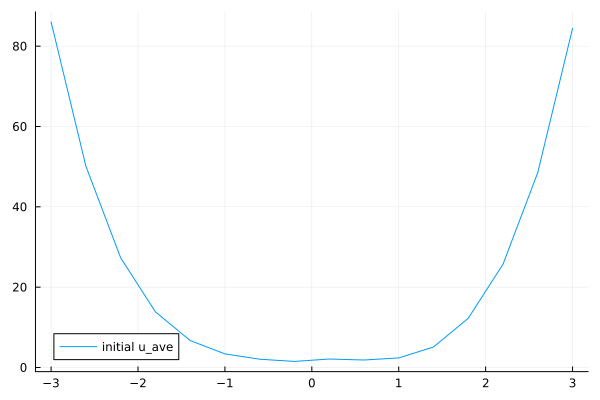

In [174]:
plot(x_centers_ext, u_bar, label="initial u_ave")

In [175]:
uL, uR, duL, duR = WENOZ_FV_reconstruct_from_averages(u_bar, dx) # Just to test that it runs

([19.30000000000002, 9.453599999999994, 4.573600000000002, 2.5096000000000007, 1.6755999999999998, 1.7000000000000002, 2.108933333333333, 1.8662666666666667, 3.2136000000000045, 7.770266666666666, 17.720000000000006], [19.30000000000001, 9.4536, 4.573600000000001, 2.542933333333334, 1.542266666666667, 1.9000000000000001, 1.9822666666666664, 1.8995999999999988, 3.173600000000009, 7.823599999999988, 17.70000000000003], [-43.73920000000003, -24.46240000000003, -12.097599999999993, -5.1088000000000005, -2.3350000000000004, 0.7597999999999994, 0.08659999999999911, -0.39360000000000006, 3.030200000000019, 11.368999999999964, 24.383800000000075], [-38.440000000000055, -20.776000000000028, -9.716799999999983, -3.601400000000002, -1.8938000000000004, 1.4419999999999993, 0.34199999999999936, -0.13280000000000305, 4.003600000000029, 13.41219999999994, 27.529000000000128])

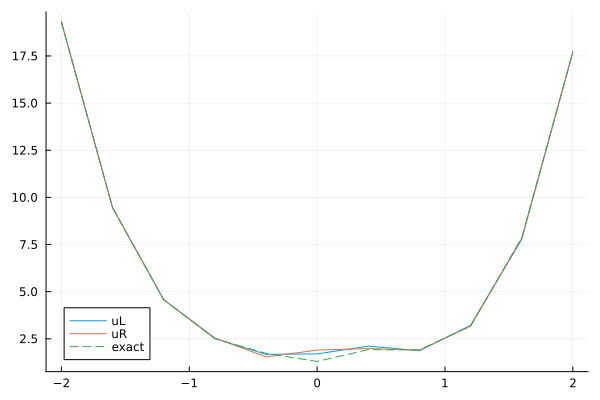

In [176]:
plot(x_p, uL, label="uL")
plot!(x_p, uR, label="uR")
u_exact = [xi^p + θ(xi,x1) + abs(xi - x2) for xi in x_p]
plot!(x_p, u_exact, label="exact", linestyle=:dash)

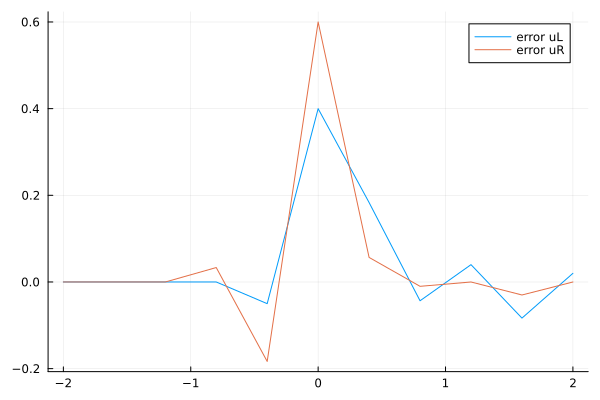

In [177]:
plot(x_p, uL - u_exact, label="error uL")
plot!(x_p, uR - u_exact, label="error uR")

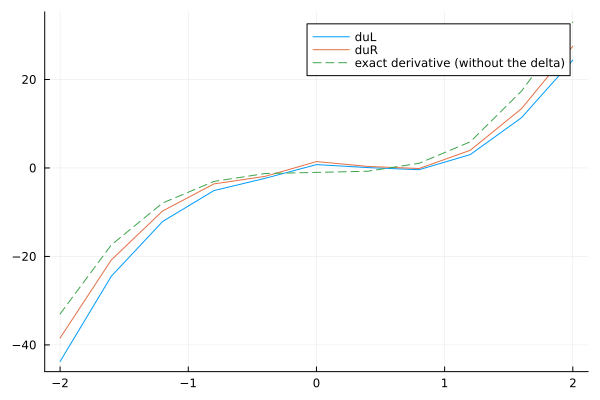

In [178]:
du_exact = [p*xi^(p-1) + θ(xi,x2) - θ(x2,xi) for xi in x_p]
plot(x_p, duL, label="duL")
plot!(x_p, duR, label="duR")
plot!(x_p, du_exact, label="exact derivative (without the delta)", linestyle=:dash, legend=:topright)


## New derivatives

In [179]:
duLnew, duRnew = WENOZ_derivatives_form_uLR(uL, uR, dx)

([-13.342666666666702, -21.04600000000002, -7.901583333333319, -3.2146666666666706, -0.8358611111111113, 0.8562499999999997, -0.04330555555555679, 0.5764722222222303, 6.58769444444444, 20.874472222222224, 13.560722222222232], [-13.342666666666682, -21.052944444444456, -7.8182499999999955, -3.4785555555555554, -0.5316944444444449, 0.8673611111111106, -0.34052777777778176, 0.7514722222222399, 6.598805555555531, 20.918916666666696, 13.434333333333399])

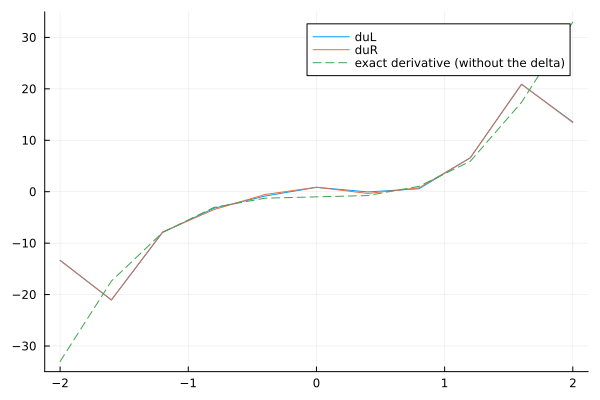

In [180]:
#du_exact = [p*xi^(p-1) + 0.0 for xi in x]
plot(x_p, duLnew, label="duL")
plot!(x_p, duRnew, label="duR")
plot!(x_p, du_exact, label="exact derivative (without the delta)", linestyle=:dash, legend=:topright)